In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>EDA</h2>

In [2]:
dataframe = pd.read_csv(r'.\data\winequality-red.csv')
dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
dataframe.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
dataframe.shape

(1599, 12)

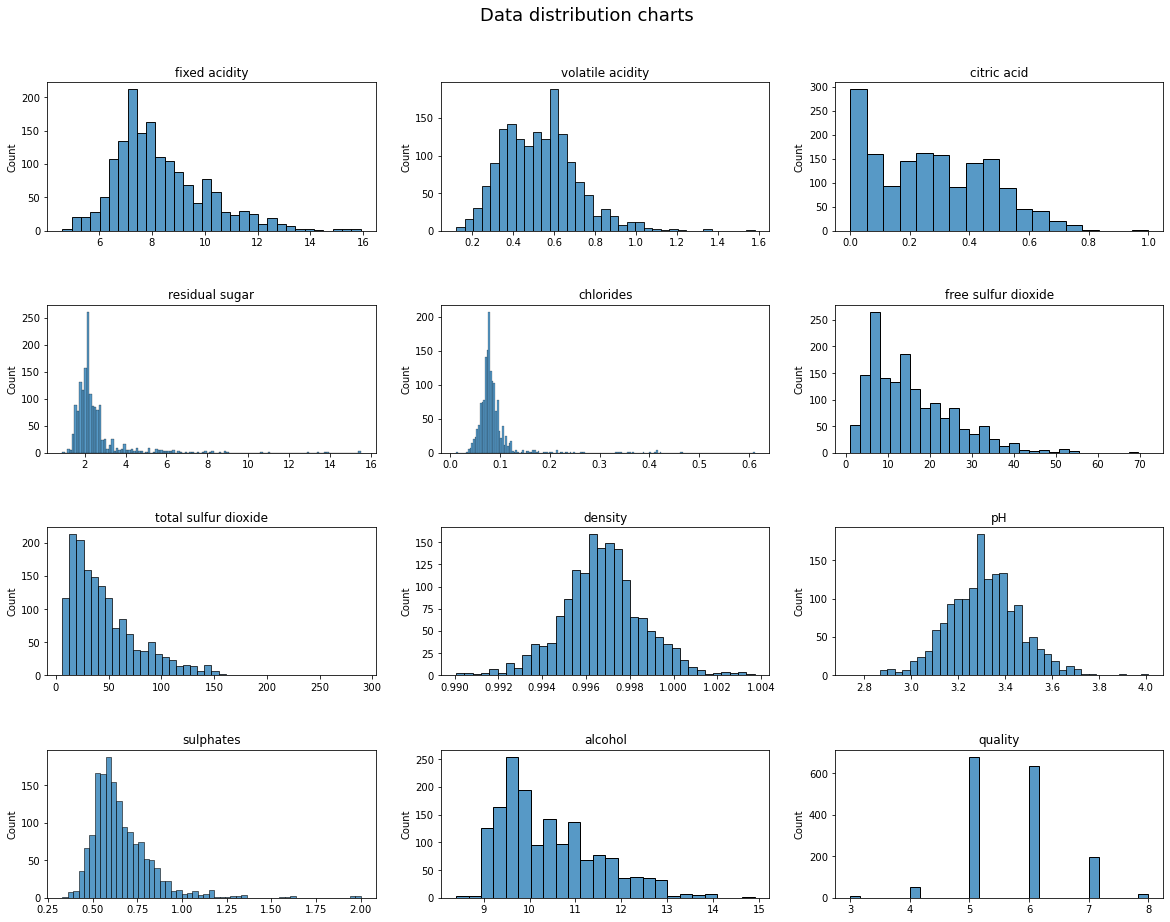

In [6]:
fig = plt.figure(figsize=(20, 15))
fig.suptitle('Data distribution charts', fontsize=18, y=0.95)
fig.subplots_adjust(hspace=0.5)

num = 1
for col in dataframe.columns:
    ax = fig.add_subplot(4, 3, num)
    ax.set_title(col)
    sns.histplot(x=col, data=dataframe, ax=ax)
    ax.set_xlabel("")
    num += 1

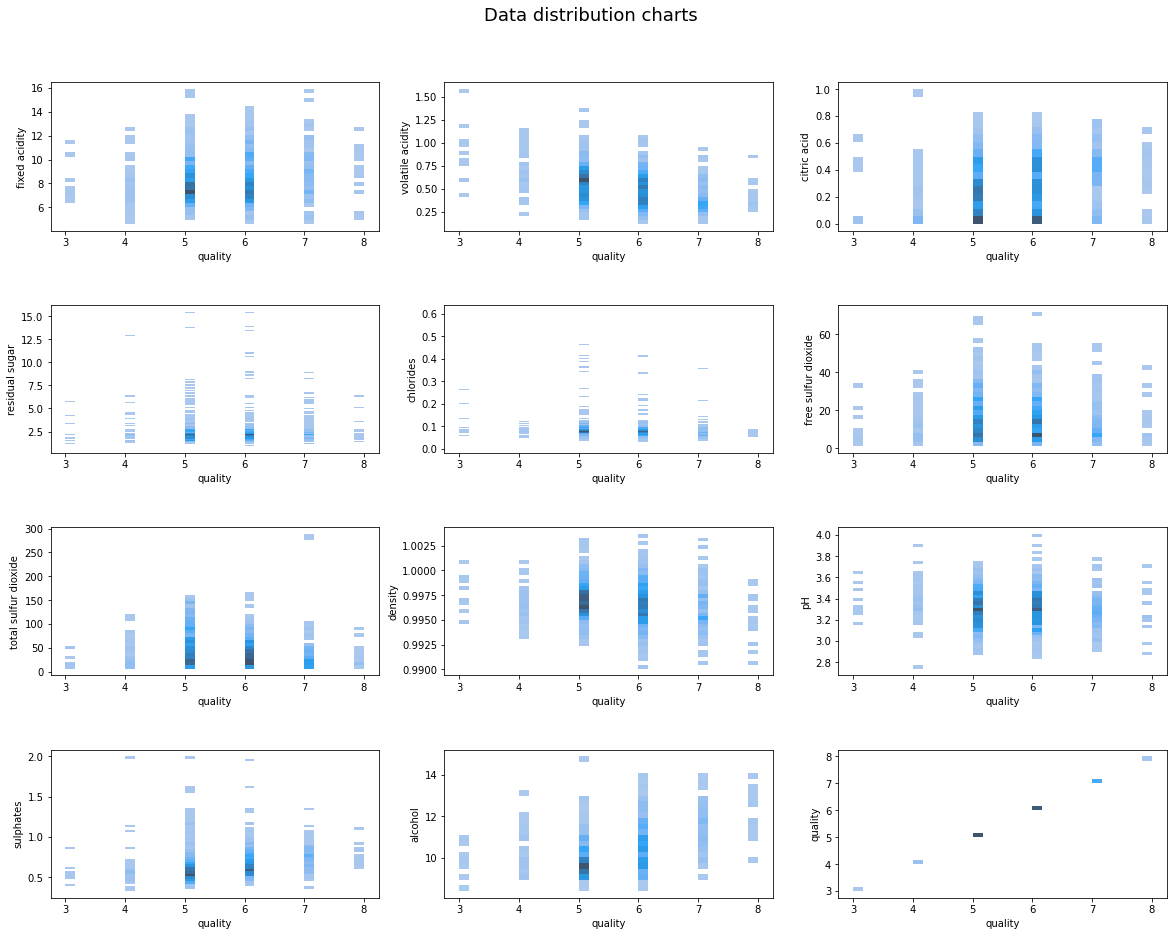

In [7]:
fig = plt.figure(figsize=(20, 15))
fig.suptitle('Data distribution charts', fontsize=18, y=0.95)
fig.subplots_adjust(hspace=0.5)

num = 1
for col in dataframe.columns:
    ax = fig.add_subplot(4, 3, num)
    sns.histplot(x='quality', y=col, data=dataframe, ax=ax)
    num += 1

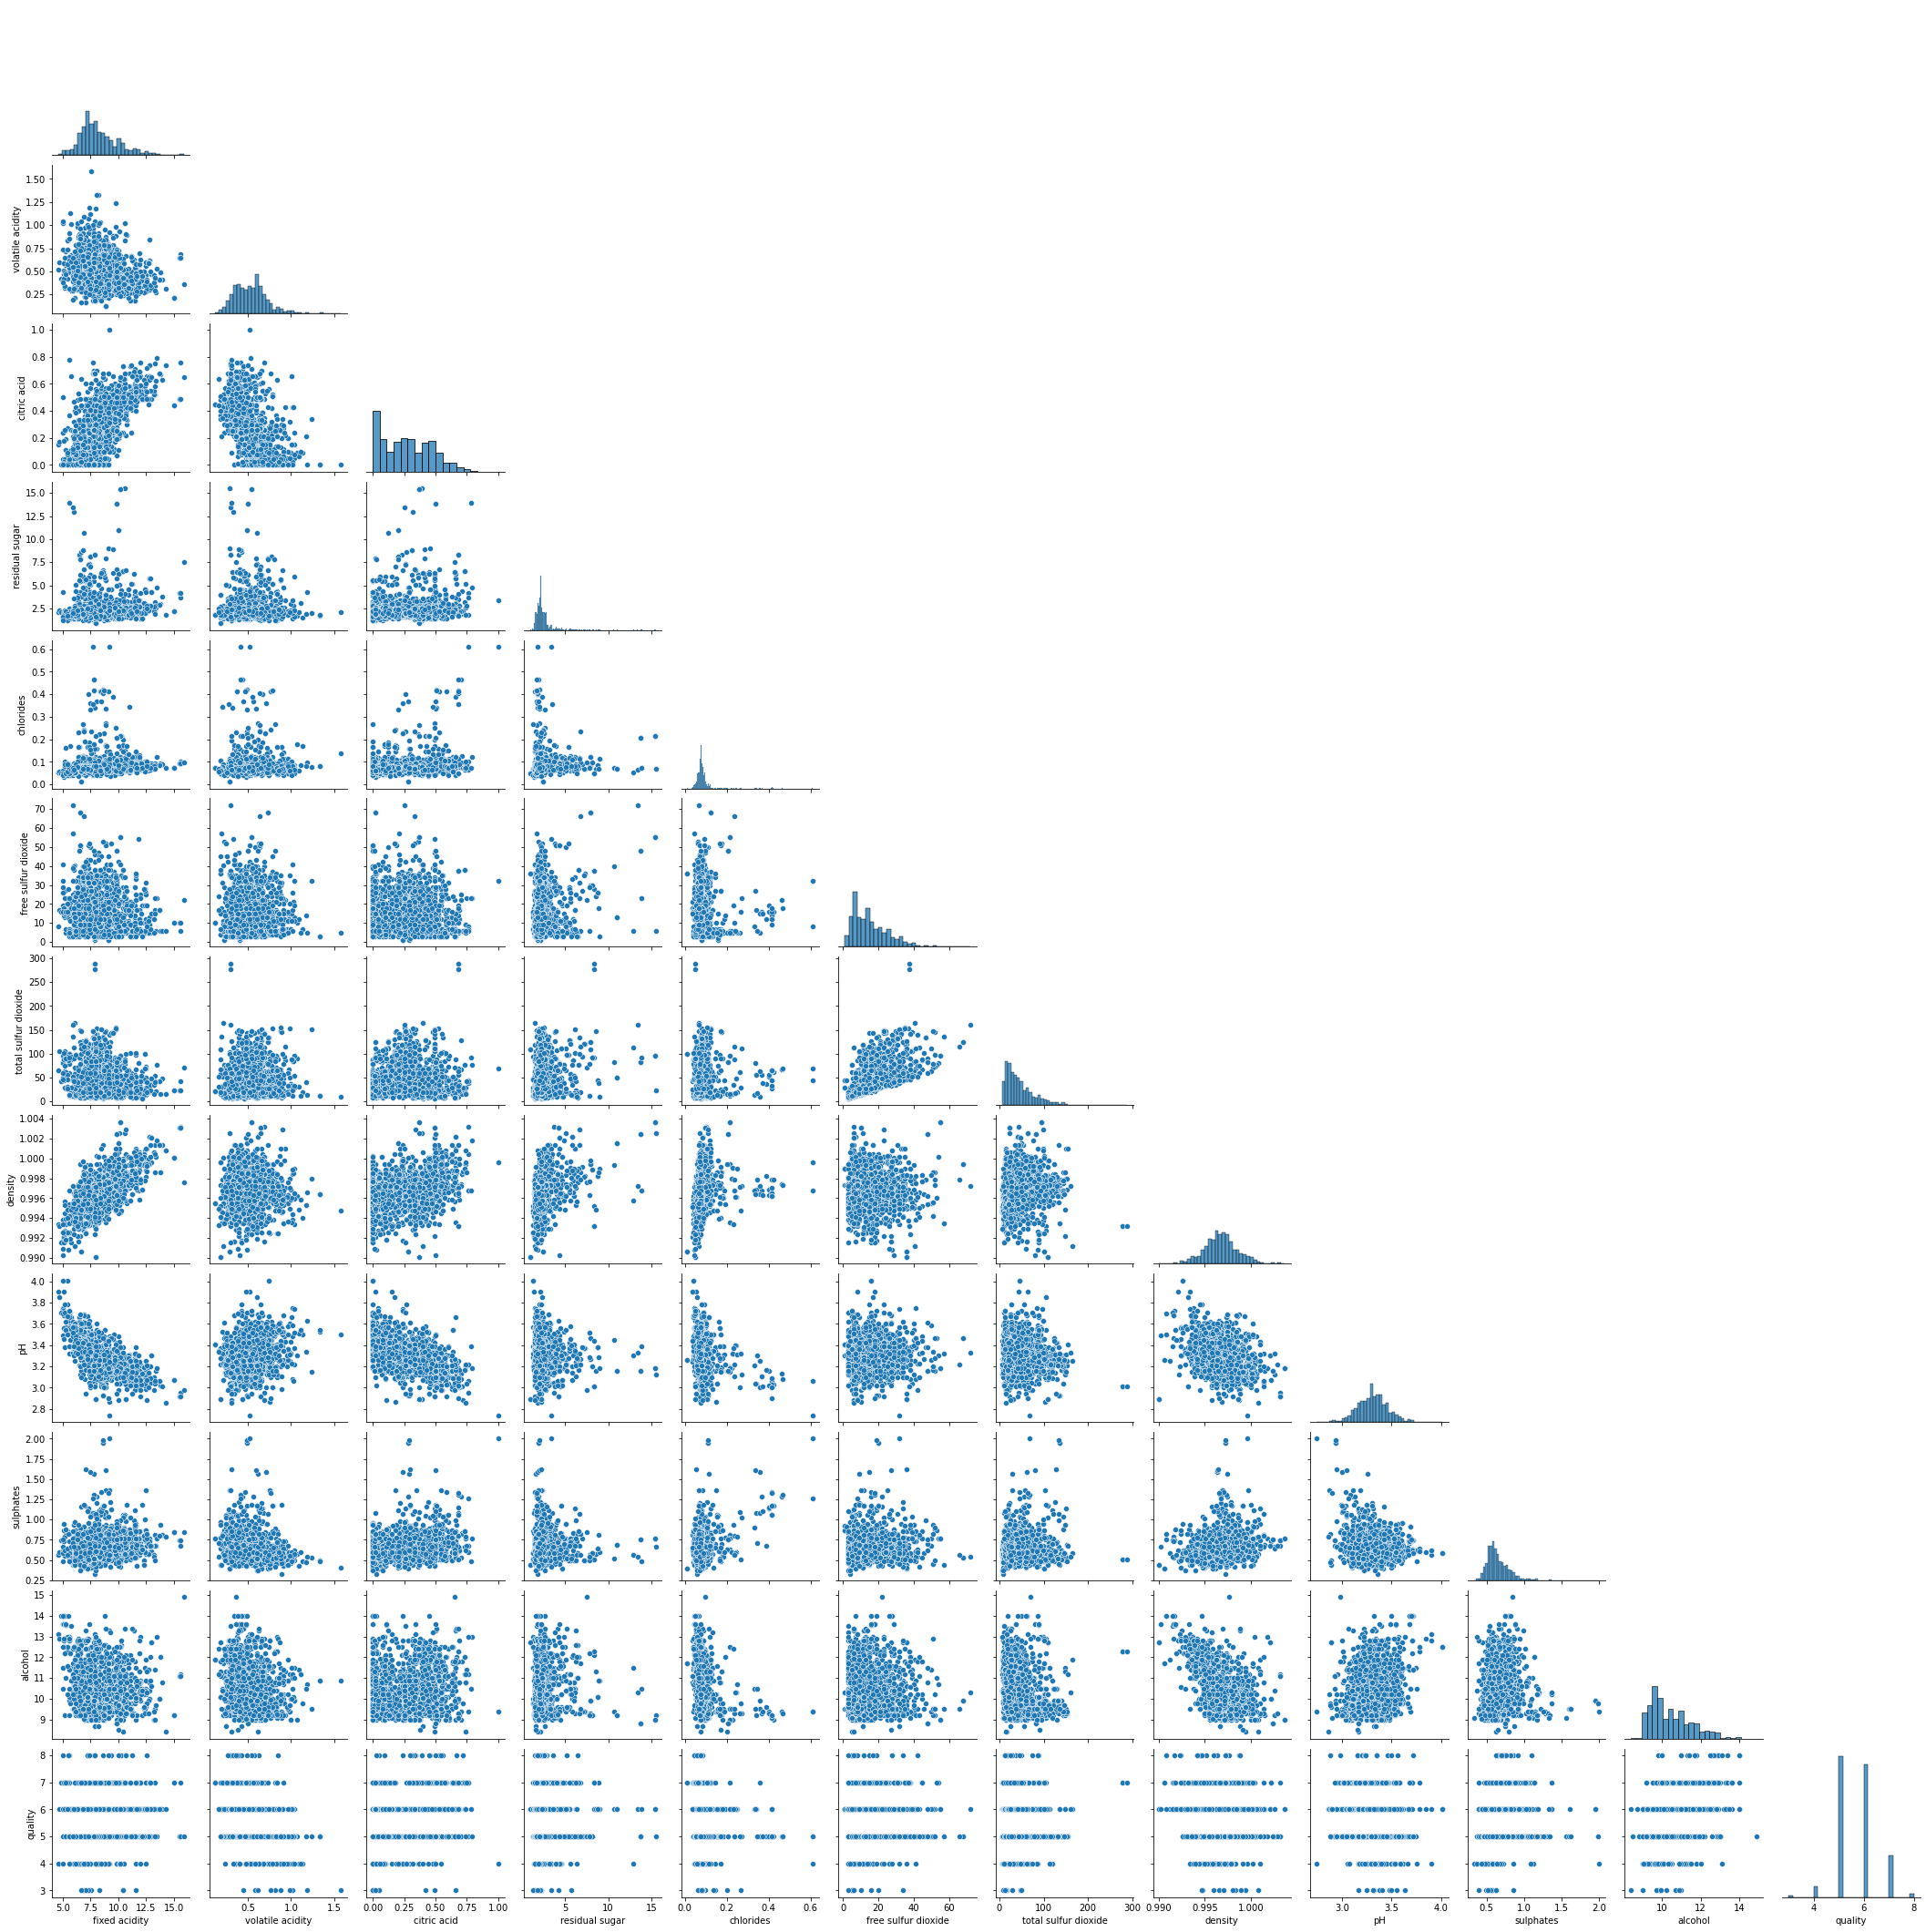

In [8]:
sns.pairplot(dataframe, diag_kind='hist', corner=True)

In [9]:
dataframe.drop(dataframe.loc[dataframe['fixed acidity'] > 14.5].index, inplace=True)
dataframe.drop(dataframe.loc[dataframe['volatile acidity'] > 1.2].index, inplace=True)
dataframe.drop(dataframe.loc[dataframe['citric acid'] > 0.8].index, inplace=True)
dataframe.drop(dataframe.loc[dataframe['residual sugar'] > 5].index, inplace=True)
dataframe.drop(dataframe.loc[dataframe['chlorides'] > 0.15].index, inplace=True)
dataframe.drop(dataframe.loc[dataframe['chlorides'] < 0.03].index, inplace=True)
dataframe.drop(dataframe.loc[dataframe['free sulfur dioxide'] > 60].index, inplace=True)
dataframe.drop(dataframe.loc[dataframe['total sulfur dioxide'] > 150].index, inplace=True)
dataframe.drop(dataframe.loc[dataframe['pH'] > 3.8].index, inplace=True)
dataframe.drop(dataframe.loc[dataframe['sulphates'] > 1.25].index, inplace=True)
dataframe.drop(dataframe.loc[dataframe['alcohol'] > 14].index, inplace=True)
dataframe.drop(dataframe.loc[dataframe['alcohol'] < 9].index, inplace=True)

dataframe['quality'] = np.where(dataframe['quality'] > 5, 1, 0)

In [10]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1422.0,8.292546,1.681731,4.90000,7.10000,7.9000,9.2000,14.0000
volatile acidity,1422.0,0.524205,0.172429,0.12000,0.39000,0.5200,0.6300,1.1850
citric acid,1422.0,0.261006,0.190014,0.00000,0.09000,0.2500,0.4200,0.7900
residual sugar,1422.0,2.280731,0.609866,0.90000,1.90000,2.2000,2.5000,5.0000
chlorides,1422.0,0.079466,0.016221,0.03800,0.07000,0.0785,0.0880,0.1470
free sulfur dioxide,1422.0,15.593530,9.744919,1.00000,8.00000,14.0000,21.0000,57.0000
total sulfur dioxide,1422.0,44.530942,29.748815,6.00000,22.00000,37.0000,60.0000,149.0000
density,1422.0,0.996628,0.001774,0.99007,0.99552,0.9966,0.9977,1.0021
pH,1422.0,3.318432,0.146052,2.88000,3.22000,3.3200,3.4100,3.7800
sulphates,1422.0,0.641899,0.133170,0.33000,0.55000,0.6200,0.7100,1.2200


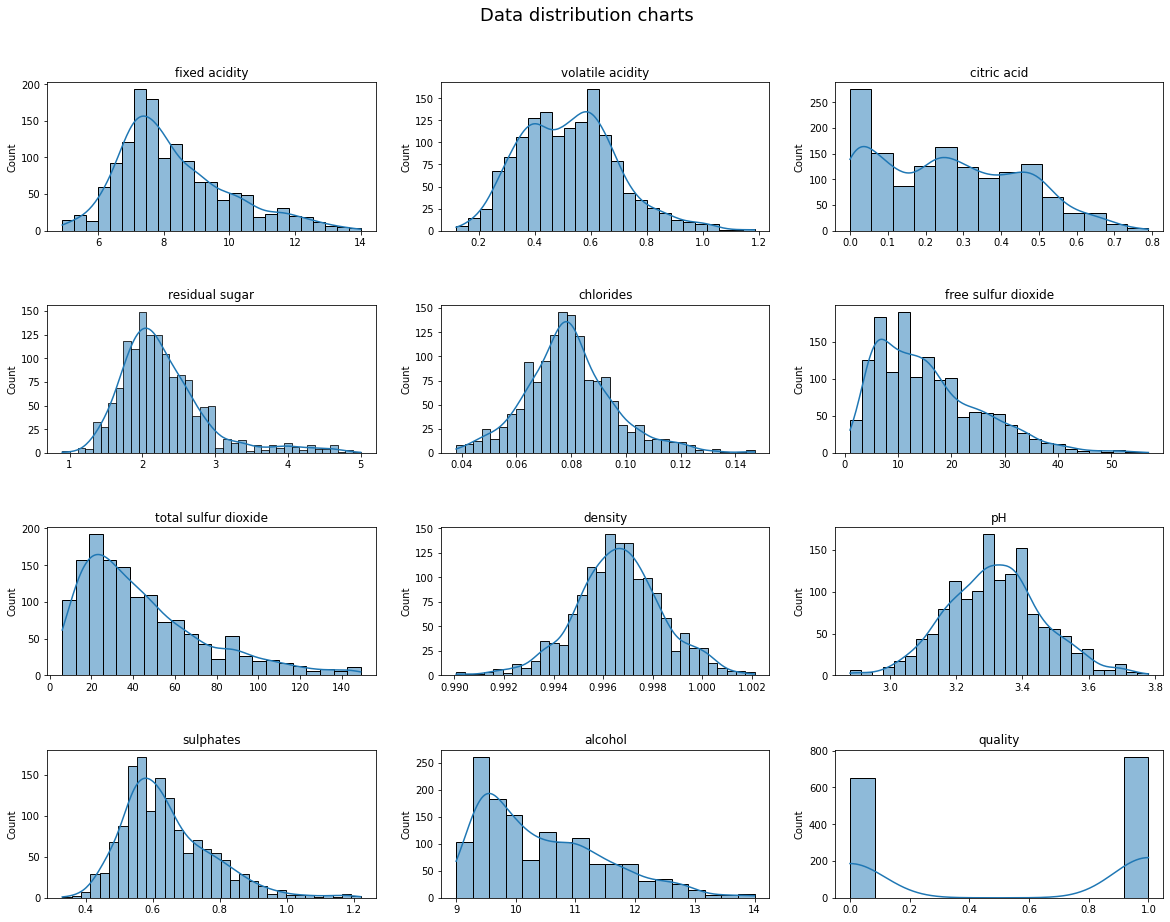

In [11]:
fig = plt.figure(figsize=(20, 15))
fig.suptitle('Data distribution charts', fontsize=18, y=0.95)
fig.subplots_adjust(hspace=0.5)

num = 1
for col in dataframe.columns:
    ax = fig.add_subplot(4, 3, num)
    ax.set_title(col)
    sns.histplot(x=col, data=dataframe, kde=True, ax=ax)
    ax.set_xlabel("")
    num += 1

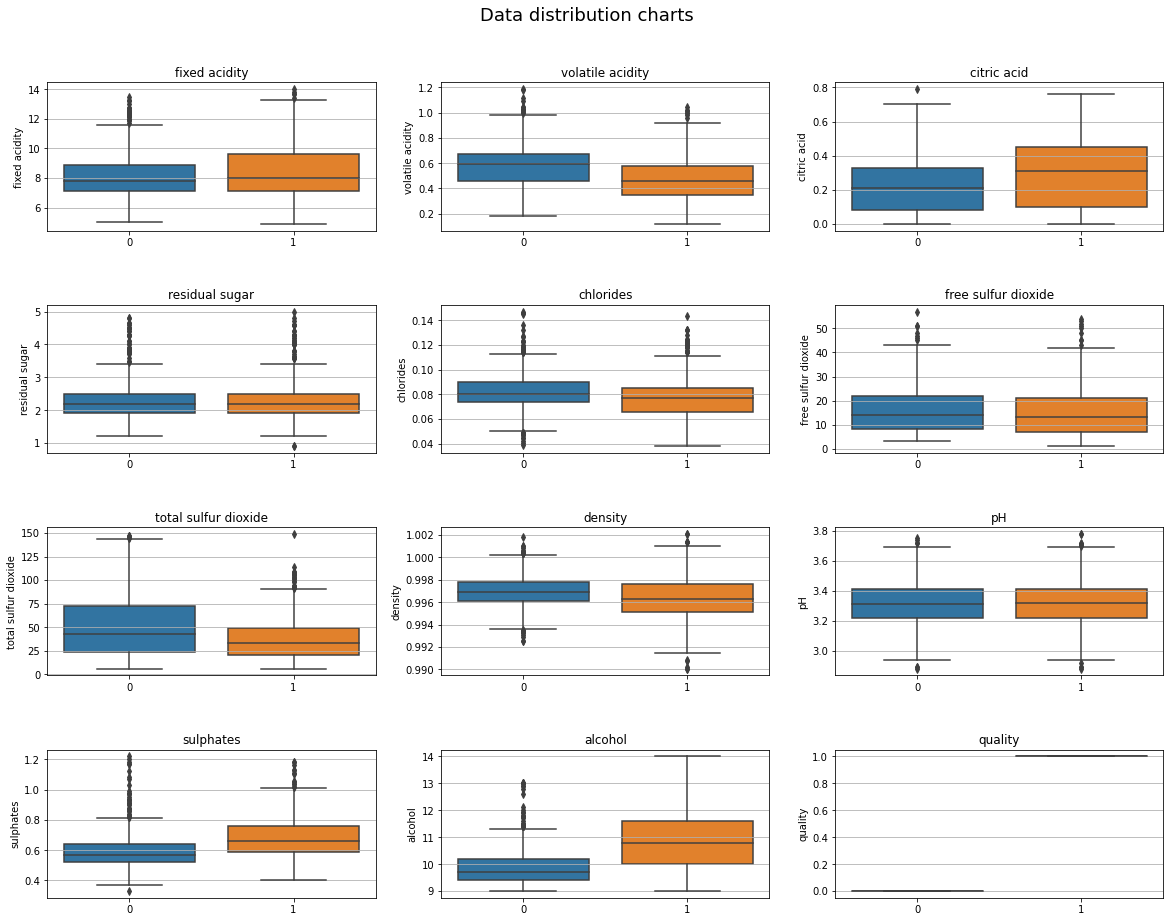

In [12]:
fig = plt.figure(figsize=(20, 15))
fig.suptitle('Data distribution charts', fontsize=18, y=0.95)
fig.subplots_adjust(hspace=0.5)

num = 1
for col in dataframe.columns:
    ax = fig.add_subplot(4, 3, num)
    ax.set_title(col)
    ax.grid(True)
    sns.boxplot(x='quality', y=col, data=dataframe, ax=ax)
    ax.set_xlabel("")
    num += 1

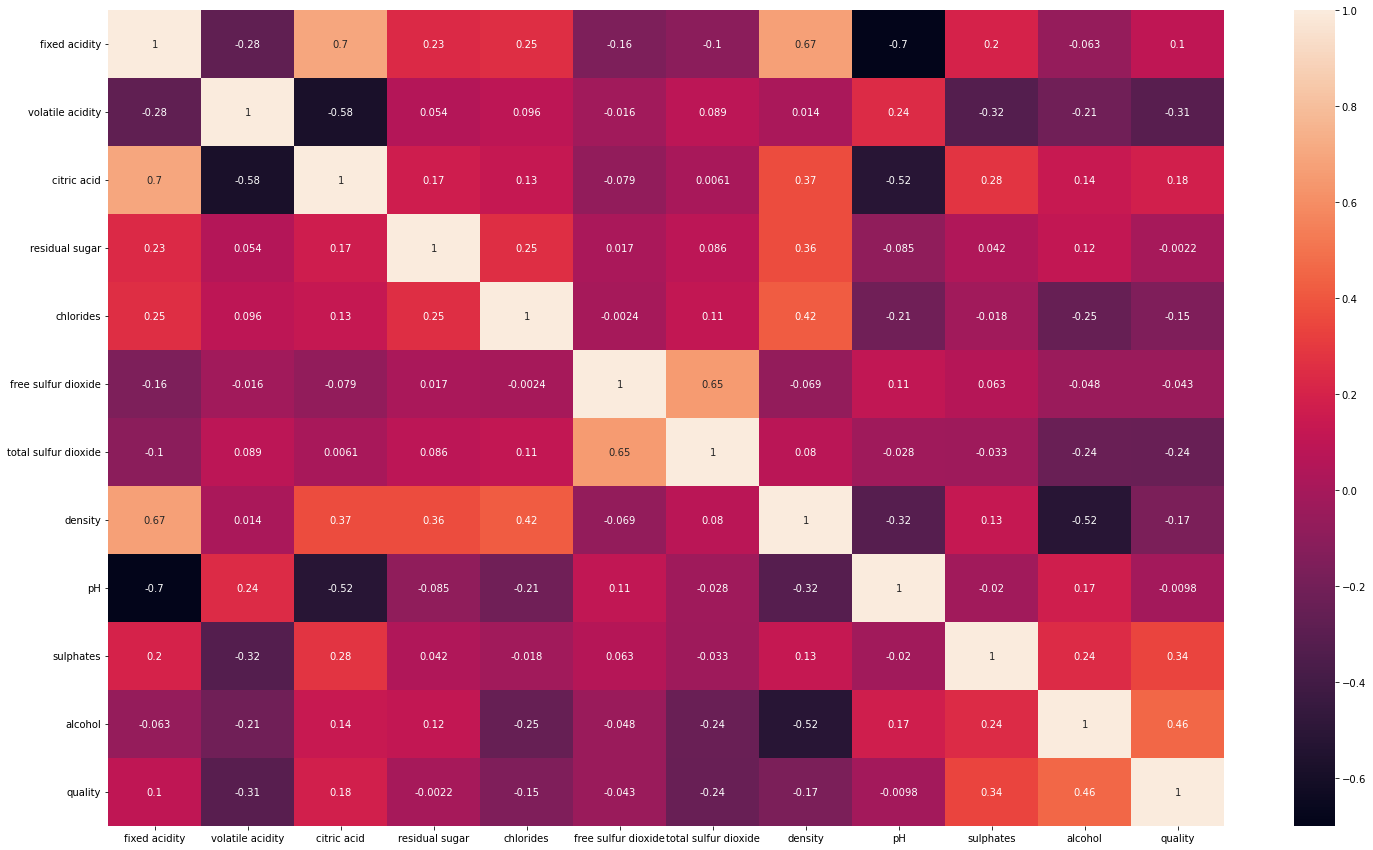

In [13]:
plt.figure(figsize = (25, 15))
sns.heatmap(dataframe.corr(), annot=True);

In [14]:
X_train = dataframe.drop(['quality'], axis=1)
y_train = dataframe['quality']

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42, test_size=0.3, shuffle=True)

<h2>Logistic regression</h2>

In [61]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=42, solver='saga', max_iter=4588, penalty='l2')
logistic_regression.fit(X_train, y_train)

result = logistic_regression.predict(X_test)

print(f"Logistic Regression model accuracy score: {accuracy_score(y_test, result)}\n\n")
print("Classification report")
print(f"{classification_report(y_test, result)}")
confusion_matrix(y_test, result)

Logistic Regression model accuracy score: 0.7681498829039812


Classification report
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       198
           1       0.80      0.76      0.78       229

    accuracy                           0.77       427
   macro avg       0.77      0.77      0.77       427
weighted avg       0.77      0.77      0.77       427



array([[154,  44],
       [ 55, 174]], dtype=int64)

<h2>KNN classifier</h2>

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=25)
knn_classifier.fit(X_train, y_train)

result = knn_classifier.predict(X_test)

print(f"Logistic Regression model accuracy score: {accuracy_score(y_test, result)}\n\n")
print("Classification report")
print(f"{classification_report(y_test, result)}")

sns.heatmap(confusion_matrix(y_test, result) / len(y_test), annot=True, fmt=".1%")

Logistic Regression model accuracy score: 0.7447306791569087


Classification report
              precision    recall  f1-score   support

           0       0.74      0.69      0.72       198
           1       0.75      0.79      0.77       229

    accuracy                           0.74       427
   macro avg       0.74      0.74      0.74       427
weighted avg       0.74      0.74      0.74       427



array([[137,  61],
       [ 48, 181]], dtype=int64)

<h4>Getting best parameters for the model</h4>

In [52]:
knn_params = {"n_neighbors": np.arange(20, 40),
                 "weights": ['uniform', 'distance'],
                     "leaf_size": [25, 30, 35]}
knn_classifier = KNeighborsClassifier()
knn_cv = GridSearchCV(knn_classifier, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [25, 30, 35],
                         'n_neighbors': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39]),
                         'weights': ['uniform', 'distance']})

In [63]:
print(f"Best score on training data: {knn_cv.best_score_}")
print(f"Best model: {knn_cv.best_estimator_}")
print(f"Best parameters for KNN model: {knn_cv.best_params_}")

Best score on training data: 0.798030303030303
Best model: KNeighborsClassifier(leaf_size=25, n_neighbors=21, weights='distance')
Best parameters for KNN model: {'leaf_size': 25, 'n_neighbors': 21, 'weights': 'distance'}


In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=21, leaf_size=25, weights='distance')
knn_classifier.fit(X_train, y_train)

result = knn_classifier.predict(X_test)

print(f"Logistic Regression model accuracy score: {accuracy_score(y_test, result)}\n\n")
print("Classification report")
print(f"{classification_report(y_test, result)}")

sns.heatmap(confusion_matrix(y_test, result) / len(y_test), annot=True, fmt=".1%")

Logistic Regression model accuracy score: 0.7939110070257611


Classification report
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       198
           1       0.79      0.83      0.81       229

    accuracy                           0.79       427
   macro avg       0.79      0.79      0.79       427
weighted avg       0.79      0.79      0.79       427



array([[148,  50],
       [ 38, 191]], dtype=int64)

<h2>Decision Tree classifier</h2>

Decision Tree model accuracy score: 0.7236533957845434


Classification report
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       198
           1       0.75      0.72      0.74       229

    accuracy                           0.72       427
   macro avg       0.72      0.72      0.72       427
weighted avg       0.73      0.72      0.72       427



<AxesSubplot:>

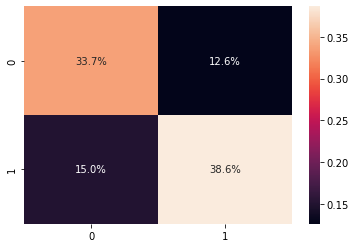

In [87]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

result = decision_tree_classifier.predict(X_test)

print(f"Decision Tree model accuracy score: {accuracy_score(y_test, result)}\n\n")
print("Classification report")
print(f"{classification_report(y_test, result)}")

sns.heatmap(confusion_matrix(y_test, result) / len(y_test), annot=True, fmt=".1%")

<h2>Random Forest classifier</h2>

Random Forest model accuracy score: 0.8126463700234192


Classification report
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       198
           1       0.83      0.82      0.82       229

    accuracy                           0.81       427
   macro avg       0.81      0.81      0.81       427
weighted avg       0.81      0.81      0.81       427



<AxesSubplot:>

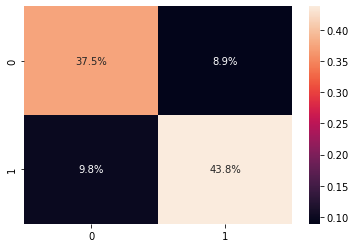

In [88]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)

result = random_forest_classifier.predict(X_test)

print(f"Random Forest model accuracy score: {accuracy_score(y_test, result)}\n\n")
print("Classification report")
print(f"{classification_report(y_test, result)}")

sns.heatmap(confusion_matrix(y_test, result) / len(y_test), annot=True, fmt=".1%")

<h4>Getting best parameters for the model</h4>

In [96]:
random_forest_params = {"n_estimators": np.arange(50, 500, 50),
                           "criterion": ["gini", "entropy"],
                                   "class_weight": ["balanced", "balanced_subsample", None]}

random_forest_classifier = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(random_forest_classifier, random_forest_params, cv=10)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])})

In [98]:
print(f"Best score on training data: {rf_cv.best_score_}")
print(f"Best model: {rf_cv.best_estimator_}")
print(f"Best parameters for KNN model: {rf_cv.best_params_}")

Best score on training data: 0.804
Best model: RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=200, n_jobs=-1)
Best parameters for KNN model: {'class_weight': 'balanced', 'criterion': 'entropy', 'n_estimators': 200}


Random Forest model accuracy score: 0.8126463700234192


Classification report
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       198
           1       0.83      0.81      0.82       229

    accuracy                           0.81       427
   macro avg       0.81      0.81      0.81       427
weighted avg       0.81      0.81      0.81       427



<AxesSubplot:>

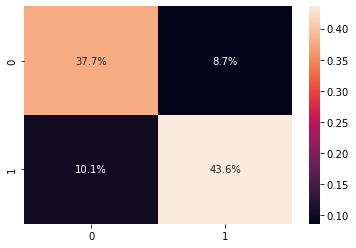

In [99]:
random_forest_classifier = RandomForestClassifier(class_weight='balanced', criterion='entropy', n_estimators=200, n_jobs=-1)
random_forest_classifier.fit(X_train, y_train)

result = random_forest_classifier.predict(X_test)

print(f"Random Forest model accuracy score: {accuracy_score(y_test, result)}\n\n")
print("Classification report")
print(f"{classification_report(y_test, result)}")

sns.heatmap(confusion_matrix(y_test, result) / len(y_test), annot=True, fmt=".1%")

<h2>Support Vector Machine model</h2>

Support vector classifier accuracy score: 0.7564402810304449


Classification report
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       198
           1       0.80      0.72      0.76       229

    accuracy                           0.76       427
   macro avg       0.76      0.76      0.76       427
weighted avg       0.76      0.76      0.76       427



<AxesSubplot:>

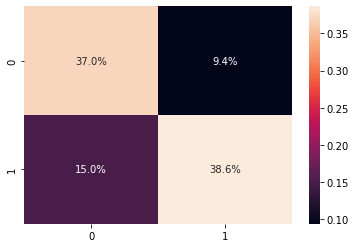

In [100]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

result = svc_model.predict(X_test)

print(f"Support vector classifier accuracy score: {accuracy_score(y_test, result)}\n\n")
print("Classification report")
print(f"{classification_report(y_test, result)}")

sns.heatmap(confusion_matrix(y_test, result) / len(y_test), annot=True, fmt=".1%")

<h2>Gradient Boosting classifier</h2>

Gradient Boosting classifier accuracy score: 0.7564402810304449


Classification report
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       198
           1       0.80      0.72      0.76       229

    accuracy                           0.76       427
   macro avg       0.76      0.76      0.76       427
weighted avg       0.76      0.76      0.76       427



<AxesSubplot:>

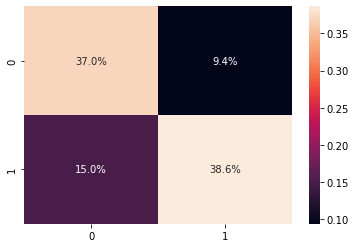

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)

gbm_model.predict(X_test)

print(f"Gradient Boosting classifier accuracy score: {accuracy_score(y_test, result)}\n\n")
print("Classification report")
print(f"{classification_report(y_test, result)}")

sns.heatmap(confusion_matrix(y_test, result) / len(y_test), annot=True, fmt=".1%")

In [104]:
gbs_params = {"learning_rate": [0.005, 0.008, 0.1, 0.15],
                 "n_estimators": [50, 100, 150, 200],
                     "max_depth": [2, 3, 4],
                         "min_samples_split": [2, 3, 4]}

gbs_model = GradientBoostingClassifier()
gbs_cv = GridSearchCV(gbs_model, gbs_params, cv=10)
gbs_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.005, 0.008, 0.1, 0.15],
                         'max_depth': [2, 3, 4], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150, 200]})

In [105]:
print(f"Best score on training data: {gbs_cv.best_score_}")
print(f"Best model: {gbs_cv.best_estimator_}")
print(f"Best parameters for KNN model: {gbs_cv.best_params_}")

Best score on training data: 0.791070707070707
Best model: GradientBoostingClassifier(learning_rate=0.15, max_depth=4, n_estimators=200)
Best parameters for KNN model: {'learning_rate': 0.15, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 200}


Gradient Boosting classifier accuracy score: 0.7564402810304449


Classification report
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       198
           1       0.80      0.72      0.76       229

    accuracy                           0.76       427
   macro avg       0.76      0.76      0.76       427
weighted avg       0.76      0.76      0.76       427



<AxesSubplot:>

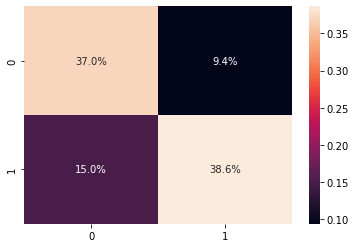

In [107]:
gbm_model = GradientBoostingClassifier(learning_rate=0.15, max_depth=4, min_samples_split=2, n_estimators=300)
gbm_model.fit(X_train, y_train)

gbm_model.predict(X_test)

print(f"Gradient Boosting classifier accuracy score: {accuracy_score(y_test, result)}\n\n")
print("Classification report")
print(f"{classification_report(y_test, result)}")

sns.heatmap(confusion_matrix(y_test, result) / len(y_test), annot=True, fmt=".1%")